# 1

## 1.1: Voxel


![](results/voxel_src.gif.gif)
![](results/voxel_tgt.gif.gif)

## 1.2


![](results/pc_src.gif)
![](results/pc_tgt.gif)

## 1.3


![](results/mesh_src.gif)
![](results/mesh_tgt.gif)

# 2

I used the --load_feat option due to hardware constraints.

## 2.1

### Input image:
![](vis/mesh/input_image110.png)
![](vis/vox/vox110.gif)
![](vis/vox/vox_gt110.gif)

![](vis/mesh/input_image135.png)
![](vis/vox/vox135.gif)
![](vis/vox/vox_gt135.gif)

![](vis/mesh/input_image103.png)
![](vis/vox/vox103.gif)
![](vis/vox/vox_gt103.gif)


## 2.2

### Input image
![](vis/point/input_image27_1250n.png)
![](vis/point/point27_1250n.gif)
![](vis/point/point_gt27_1250n.gif)

![](vis/point/input_image506_1250n.png)
![](vis/point/point506_1250n.gif)
![](vis/point/point_gt506_1250n.gif)

![](vis/point/input_image110_1250n.png)
![](vis/point/point110_1250n.gif)
![](vis/point/point_gt110_1250n.gif)

## 2.3

### Input image
![](vis/mesh/input_image103.png)
![](vis/mesh/mesh103.gif)
![](vis/mesh/mesh_gt103.gif)

![](vis/mesh/input_image27.png)
![](vis/mesh/mesh27.gif)
![](vis/mesh/mesh_gt27.gif)

![](results/input_image387.png)
![](results/mesh387.gif)
![](results/mesh_gt387.gif)

## 2.4

![](eval_mesh.png)
![](eval_point_1250n.png)
![](eval_vox.png)

In order of best to worst performance: point clouds, meshes, and voxels.
That pointclouds performed the best is unsuprising: they're the easist to optimize. Whereas meshes can only optimize the location of the vertices but not the identity
of the faces, each point in the point cloud can be optimized. Moreover, meshes are limited by the topology of their inital initialization. It is very difficult to warp a sphere to become a shape with complex holes.
Voxels performed the worst, but I suspect this to be biased by the large amount of empty voxel-grid representations. Visually, many of the voxel-representations have much less of the visual artifacts like spikes that the meshes have. These spikes likely don't contribute significantly due to the sampling loss we use, but the empty cubes in the voxel grid do. So in reality, qualitatively speaking, the two are roughly equivalent, but according to the way we score the two, meshes win out. 

## 2.5
### Varying the number of points in point cloud representation.

### 1250 starting points
![](eval_point_1250n.png)
### 1500 starting points
![](eval_point_1500.png)
### 1750 starting points
![](eval_point_1750.png)

Average F1 at 1250: 69.2

Average F1 at 1500: 71.1

Average F1 at 1750: 73.0

With more points, the representation has more capacity to fit more complex patterns and 3d shapes. 

## 2.6

I did PCA on the ResNet features and visualized 5 examples. I wanted to see if there was a connection between the resnet features and the performance of different 3d representations. 

Visually, the mesh representation created poor reconstructions on example 506 but fairly good ones on examples 27, 110, and 103. These last 3 vectors are all fairly similar to one
another, suggesting that there is a pattern to the kind of features that meshes are able to capture.

Voxel representations have poor reconstructions on examples 27, 506, and 387, and good ones on examples 110 and 103. The pattern is not as clear in this case. Perhaps what we are seeing is that there is a more linear relationship between hidden features and quality of reconstruction with meshes, but not as much for voxels. Voxel representations have upsampling layers, making it hard to identify any clear cut relationship between features and quality of voxel reconstruction. 

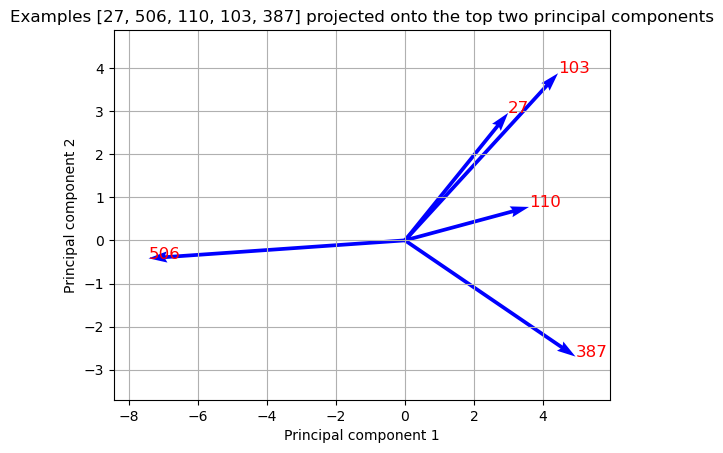

In [4]:
#!/home/jeffk/miniconda3/envs/learning3d/bin/python3
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
features = torch.load("resnet_features.pth")
features = features.squeeze(1).numpy()
pca = PCA(n_components=2)
projection = pca.fit_transform(features)
idxs = [27, 506, 110, 103, 387]
examples = projection[idxs]
fig, ax = plt.subplots()
# and remember, ax can be passed around
origins = np.zeros_like(examples)
ax.quiver(origins[:,0], origins[:,1], examples[:,0], examples[:,1], angles='xy', scale_units='xy', scale=1, color='blue')
for idx, vector_tip in zip(idxs, examples):
    x_pos, y_pos = vector_tip
    ax.text(x_pos, y_pos, str(idx), color='red', fontsize=12)
ax.set_xlabel("Principal component 1")
ax.set_ylabel("Principal component 2")
ax.set_title("Examples {} projected onto the top two principal components".format(idxs))
ax.set_xlim(examples[:,0].min() - 1, examples[:,0].max() + 1)
ax.set_ylim(examples[:,1].min() - 1, examples[:,1].max() + 1)
ax.grid(True)
plt.show()


# 3

## 3.3


### Voxel F1 trained on one class

Average F1 for one class: 63.800

![](eval_vox_.png)